# Session 8: Machine Learning (Support Vector Machine, KNN, Cross Validation)
MSA 8010: Data Programming

Agenda:
- SVM
- _k_-nearest neighbors
- _k_-fold cross validation


Sources:
- https://jakevdp.github.io/PythonDataScienceHandbook/
- https://www.accelebrate.com/library/tutorials/machine-learning-part2
- https://data-flair.training/blogs/svm-support-vector-machine-tutorial/
- https://intellipaat.com/blog/tutorial/machine-learning-tutorial/svm-algorithm-in-python/
- https://medium.com/swlh/support-vector-machines-and-the-kernel-trick-f946991ebc76

- https://ai.plainenglish.io/the-math-behind-knn-7883aa8e314c
- https://www.kaggle.com/jmataya/k-nearest-neighbors-classifier
- https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning
- https://medium.com/@rdhawan201455/knn-k-nearest-neighbour-algorithm-maths-behind-it-and-how-to-find-the-best-value-for-k-6ff5b0955e3d
- https://www.cs.cmu.edu/~schneide/tut5/node42.html

- https://machinelearningmastery.com/k-fold-cross-validation/

### Support Vector Machine (SVM)

- A Support Vector Machine (SVM) is used for either regression or classification models.
- SVM algorithm is a simple yet powerful Supervised Machine Learning algorithm.
- SVM algorithm is based on the concept of ‘decision planes’, where hyperplanes are used to classify a set of given objects.
- When performing classification, an SVM is used to create a Support Vector Classifier (SVC) to determine a hyperplane.

- The basic principle: Create a hyperplane that separates the dataset into classes.
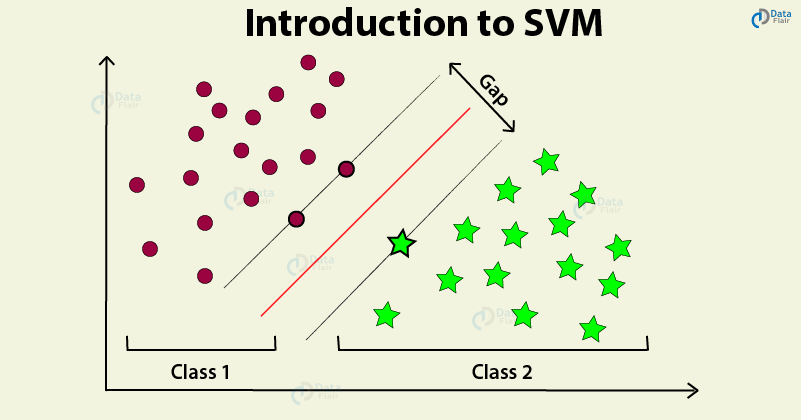
- Data on one side the hyperplane is one class, and the data on the other side of the hyperplane is another class.

- While one can hypothesize a clear line that separates the two classes, there can be many lines that can do this job.
- How do we pick the best decision boundary?

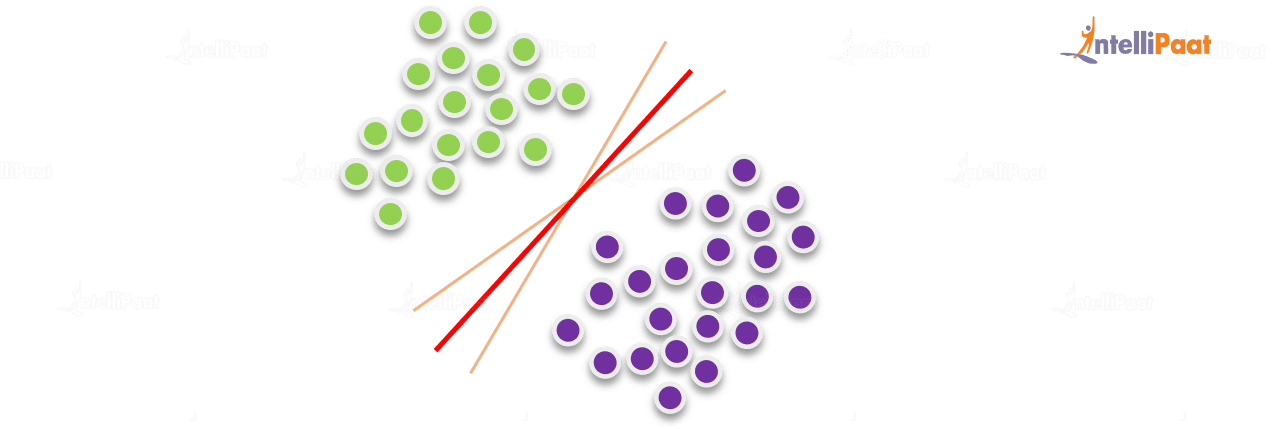



- The best decision boundary is the one that has a maximum distance from the nearest points of these two classes.
- The SVM model tries to enlarge the distance between the two classes by creating a well-defined decision boundary. 

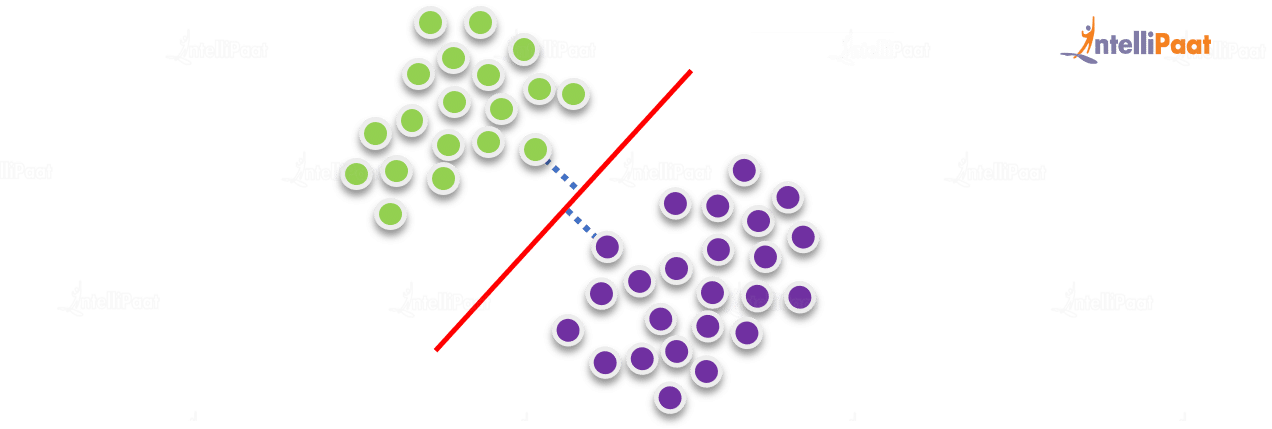



- The nearest points from the optimal decision boundary that maximize the distance are called support vectors.
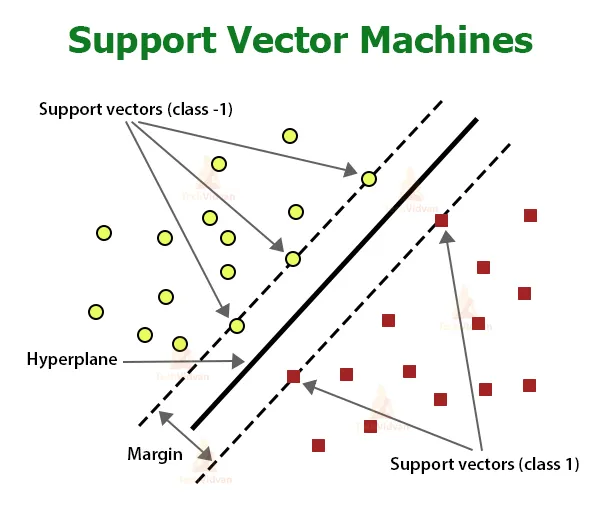

- In previous examples, our data was in 2 dimensions, the hyperplane was of 1 dimension.
- A hyperplane is a shape that is one dimension less than the number of data features.
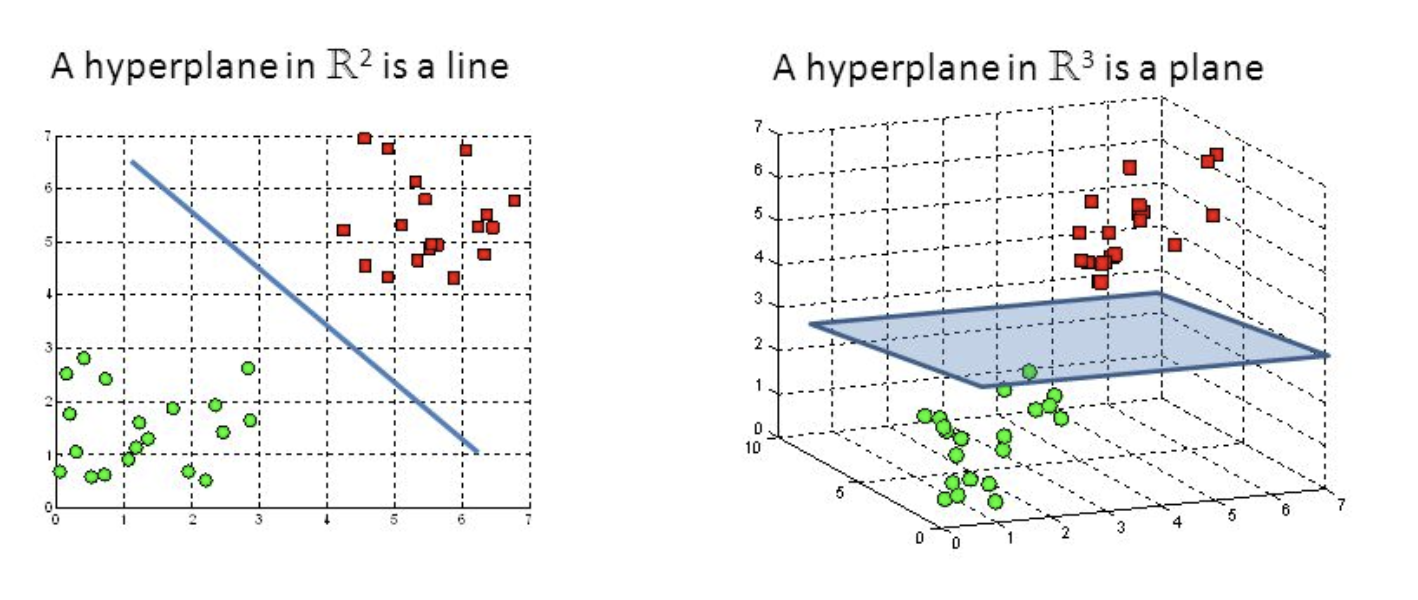

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

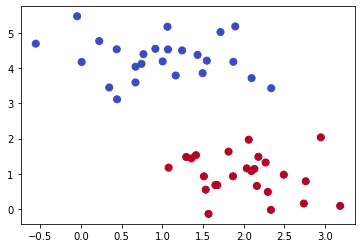

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')

- We will use Scikit-Learn's support vector classifier to train an SVM model on this data. 
- For the time being, we will use a linear kernel and set the `C` parameter to a very large number (we'll discuss it later)

In [3]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [4]:
# To better visualize what's happening here, we use a function that will plot SVM decision boundaries for us
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

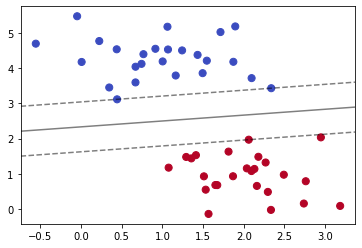

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(model)

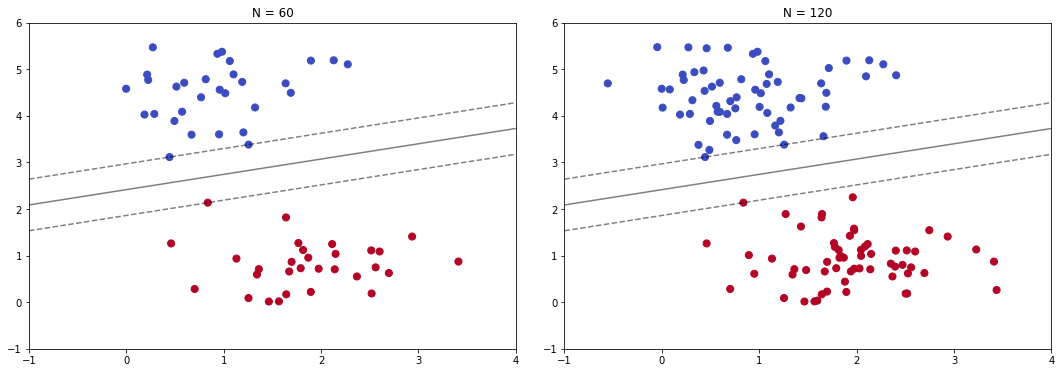

In [6]:
def plot_svm(N, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

- In the left panel, we see the model and the support vectors for 60 training points. 
- In the right panel, we have doubled the number of training points, but the model has not changed.
- The three support vectors from the left panel are still the support vectors from the right panel. 

**This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.**

### Non-linear data
- Till now, we have worked with Linear data where creating a hyperplane is quite intuitive. 
- What happens when we are required to apply this to a data where we cannot apply a linearly separable decision boundary?
- In the following example, no linear discrimination will ever be able to separate two classes.
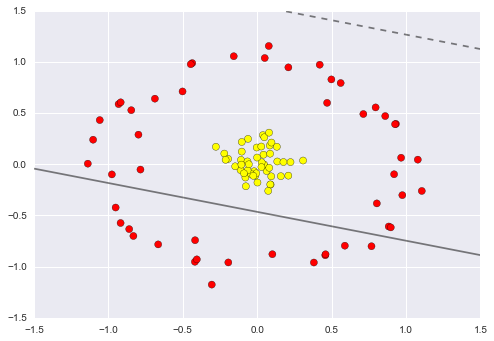

- To solve the issue, we might project the data into a higher dimension such that a linear separator would be sufficient.
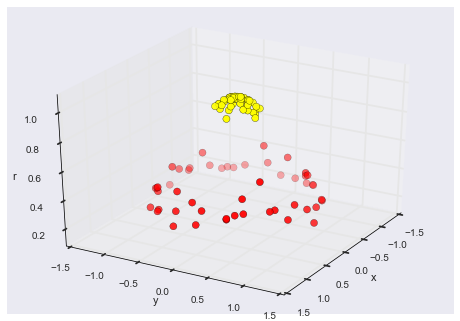

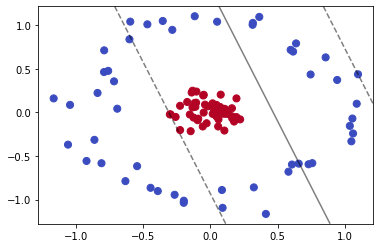

In [7]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(clf, plot_support=False)

### Installing `interact`
https://ipywidgets.readthedocs.io/en/latest/user_install.html

- conda: `conda install -c conda-forge ipywidgets`
- or, pip: `pip install ipywidgets`


### Enabling the extension

#### Jupyter Notebook with no Environment
- Already enabled on the most versions, if not:
`jupyter nbextension enable --py widgetsnbextension`

#### Jupyter Notebook with Environemnt
- `conda install -n base -c conda-forge widgetsnbextension` 
- `conda install -n <envname> -c conda-forge ipywidgets`
- `jupyter nbextension enable --py --sys-prefix widgetsnbextension`

#### Jupyter Lab with no Environment
- Already enabled on the most versions.

#### Jupyter Lab with Environemnt
`conda install -n base -c conda-forge jupyterlab_widgets`
`conda install -n <envname> -c conda-forge ipywidgets`


In [8]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
from IPython.display import clear_output

r = np.exp(-(X ** 2).sum(1)) #radial basis function

def plot_3D(elev=90, azim=270, X=X, y=y):
    fig = plt.figure(figsize=(8, 10))
    #clear_output(wait=True)
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='coolwarm')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

interact(plot_3D, elev=[0, 15, 20, 30, 45, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=5, options=(0, 15, 20, 30, 45, 90), value=90), IntSli…

### Kernels
- Where SVM becomes extremely powerful is when it is combined with _kernels_.
- The function of kernel is to take data as input and transform it into the required form. 
- Kernel functions have different types. For example, `linear`, `nonlinear`, `polynomial`, `radial basis function (RBF)`, and `sigmoid`.
- Adding a new dimension is computionally expensive, and not always an option for some problems.
- In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel.
- Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary.

In [9]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

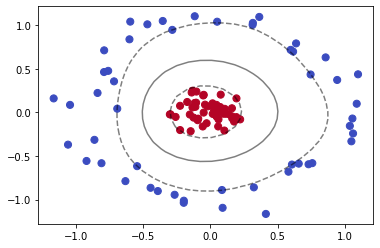

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='coolwarm')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### _k_-nearest neighbors

- KNN is a supervised machine learning algorithm that assumes similar things are near to each other.
-  It is the algorithm companies like Netflix or Spotify use in order to recommend different movies to watch or songs to listen to.
- For a given value of _k_, the algorithm will find the _k_-nearest neighbors of the data point.
- Then, it will assign the class to the data point by counting neighbor classes.
- It is a good idea to try different values for K (e.g. from 1 to 21) and see what works best.

### _k_-nearest neighbors

- KNN can be used for regression and classification problems.
    - Regression: he prediction is based on the mean or the median of the _k_ neighbors.
    - Classification: the output is the class with the highest frequency from the _k_ neighbors.

### Euclidean distance

- The Euclidean distance, in a 2d space, is the length of a line segment between two points:
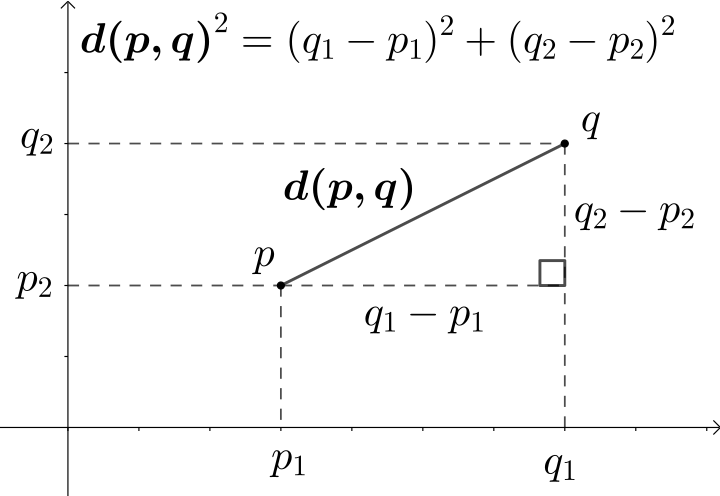


- In three dimensions, the distance is:
<img src="eu-3d.svg" width="800" />
- For _n_ dimensions:
<img src="eu-nd.svg" width="1200" />



#### How it works?
- Step-1: Select the number K of the neighbors
- Step-2: Calculate the Euclidean distance of K number of neighbors
- Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
- Step-4: Among these k neighbors, count the number of the data points in each category.
- Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
- Step-6: Our model is ready.

### An example of a new instance in _k_-NN


<img src="knn-before-after.png" width="900" />

#### Pros and Cons

- Pros:
    - K-NN algorithm is very simple to understand and equally easy to implement.
    - K-NN does not explicitly build any model, it simply learns from historical data.
    - The classifier immediately adapts as we collect new training data.
    - KNN works well with a small number of input variables, but struggles when the number of inputs is very large.

#### Pros and Cons

- Cons:
    - k-NN might be easy to implement but as dataset grows, it becomes slow.
    - k-NN does not explicitly build any model, it simply learns from historical data.
    - k-NN doesn’t perform well on imbalanced data.
    - K-NN algorithm is very sensitive to outliers.

#### Example

On the [Heart Disease Data Set](https://archive.ics.uci.edu/ml/datasets/heart+Disease):
- Predicting a patient has a heart disease or not:
    - 0 () 1 ()


In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Some of the features:
- (age) - age of patient (int)
- (sex) - 0 = female, 1 = male
- (cp) - chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
    
- ...

- target - have disease or not (0=no, 1=yes)

Read the rest here: https://archive.ics.uci.edu/ml/datasets/heart+Disease

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data Exploration

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

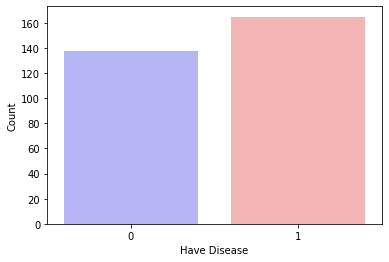

In [14]:
ax = sns.countplot(x="target", data=df, palette="bwr")
ax.set(xlabel='Have Disease', ylabel='Count')
plt.show()

In [15]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


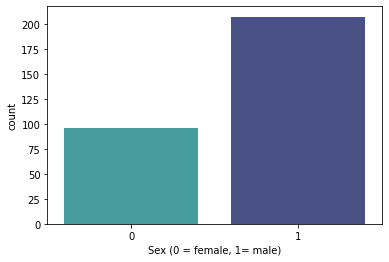

In [16]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [17]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [18]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


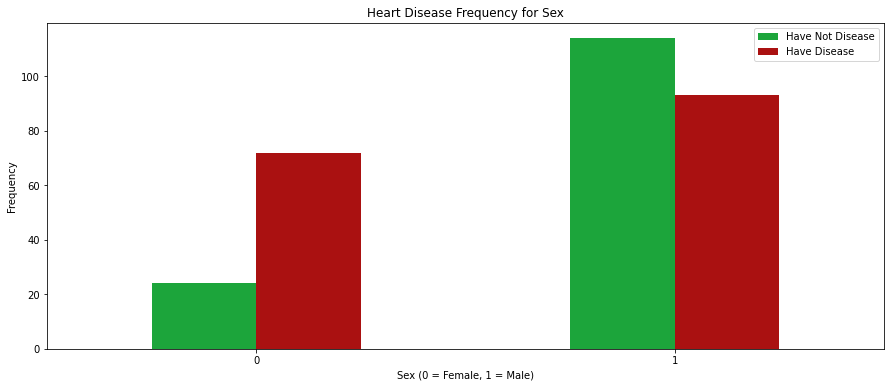

In [19]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Have Not Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

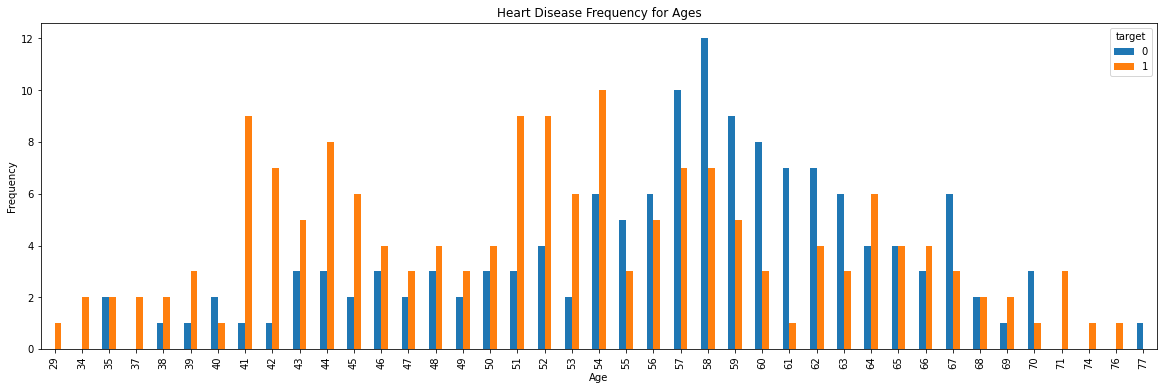

In [20]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

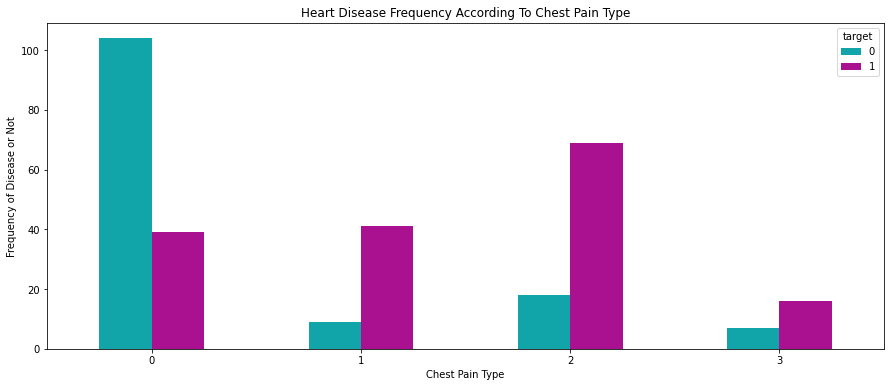

In [21]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [22]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

<img src="xnorm.png" width="600" />

In [23]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)  # n_neighbors means k
knn.fit(x_train.values, y_train)
prediction = knn.predict(x_test.values)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.values, y_test)*100))

2 NN Score: 83.61%


#### How to find the best _k_?
- _k_ in KNN is a hyperparameter.
    - In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. 
- Usually, choosing the best hyperparameter depends on the dataset.
- A small value for K provides the most adjustable fit, but might cause overfitting.

<img src="2nn.png" />

<img src="biasvar.png" />

### Testing accuracy  penalizes models that are too complex (overfitting), so we can use it to find the optimum _$k$_.

In [27]:
# try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn2.fit(x_train.values, y_train)
    score = knn2.score(x_test.values, y_test)
    scoreList.append(score)
print(scoreList)

[0.8524590163934426, 0.8360655737704918, 0.8688524590163934, 0.8688524590163934, 0.8688524590163934, 0.8524590163934426, 0.9016393442622951, 0.8688524590163934, 0.8524590163934426, 0.8524590163934426, 0.819672131147541, 0.819672131147541, 0.8032786885245902, 0.8360655737704918, 0.8360655737704918, 0.819672131147541, 0.8032786885245902, 0.8032786885245902, 0.7868852459016393]


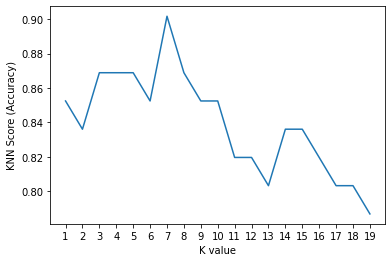

In [28]:
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("KNN Score (Accuracy)")
plt.show()

In [29]:
highest_score_index = np.argmax(scoreList)
print("Maximum KNN Score is {:.2f}%".format(scoreList[highest_score_index]*100))
print("optimal k:", highest_score_index + 1)

Maximum KNN Score is 90.16%
optimal k: 7


## We can perform _k_NN on images as well!

### Mnist dataset
- It has the size of 28*28 black & white images of hand written digits
- It’s probably the most cleanest dataset you ever find on internet for Machine/Deep learning models as it has a good bias-variance balance.

target= 2


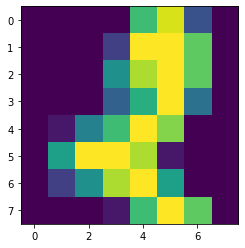

In [30]:
from sklearn.datasets import load_digits
mnist = load_digits()

index = 77
plt.imshow(mnist.images[index]);
print("target=",mnist.target[index])

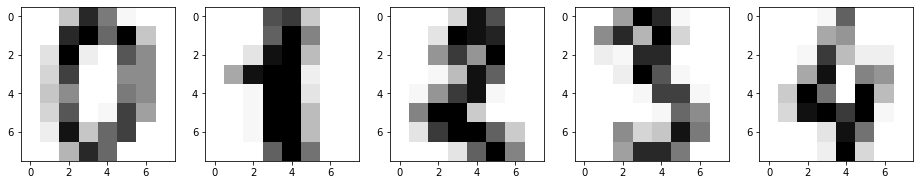

In [31]:
import numpy as np 
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 5, figsize=(16, 6))
for i in range(5):
    axes[i].imshow(mnist.images[i], cmap="Greys");

In [32]:
from sklearn.model_selection import train_test_split
X = mnist.data
y = mnist.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

y_train_df = pd.DataFrame(data=y_train, columns=['class'])
y_test_df = pd.DataFrame(data=y_test, columns=['class'])

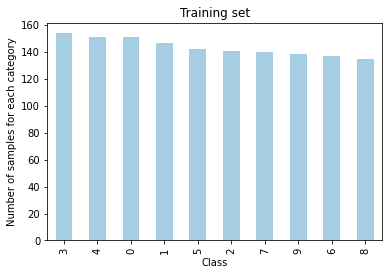

In [33]:
y_train_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()

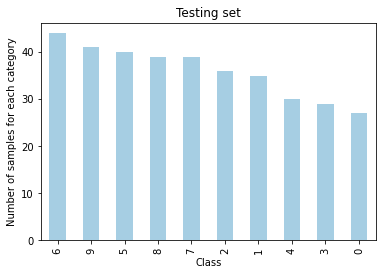

In [34]:
y_test_df['class'].value_counts().plot(kind = 'bar', colormap = 'Paired')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.show()

In [35]:
accuracies = []
for k in range(1, 20, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    # evaluate the model and update the accuracies list
    score = model.score(x_test, y_test)
    print(f"k={k}, accuracy={(score * 100):.2f}")
    accuracies.append(score)

k=1, accuracy=98.89
k=3, accuracy=98.33
k=5, accuracy=97.50
k=7, accuracy=97.50
k=9, accuracy=97.50
k=11, accuracy=97.22
k=13, accuracy=97.22
k=15, accuracy=96.94
k=17, accuracy=96.67
k=19, accuracy=96.11


In [36]:
# test data
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
predictions[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

prediction: 5 , actual: 5
prediction: 2 , actual: 2
prediction: 8 , actual: 8
prediction: 1 , actual: 1
prediction: 5 , actual: 5


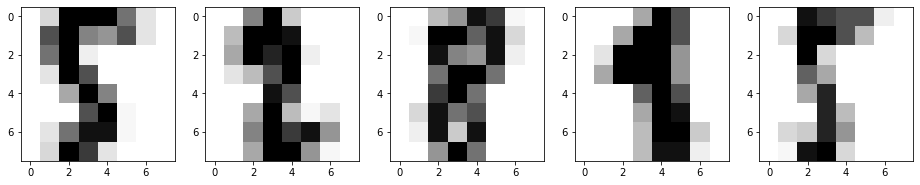

In [37]:
# loop over a few random digits
indices = [100, 140, 193, 88, 9]
f, axes = plt.subplots(1, len(indices), figsize=(16, 6))

for i in range(5):
    image = x_test[indices[i]].reshape((8, 8))
    actual_value = y_test[indices[i]]
    prediction = model.predict(image.reshape(1, -1))[0]
    axes[i].imshow(image, cmap="Greys")
    print("prediction:", prediction,", actual:", actual_value)

prediction: 3 , actual: 2
prediction: 3 , actual: 9
prediction: 9 , actual: 5
prediction: 5 , actual: 9


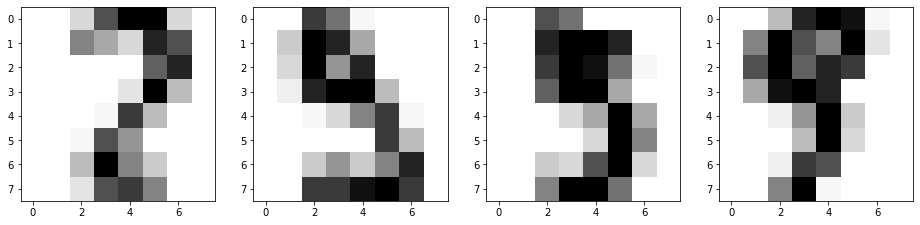

In [38]:
# Some wrong predictions
f, axes = plt.subplots(1, 4, figsize=(16, 6))
ax_indx=0
for i in range(len(x_test)):
    image = x_test[i].reshape((8, 8))
    actual_value = y_test[i]
    prediction = model.predict(image.reshape(1, -1))[0]
    if prediction!=actual_value and ax_indx < 4:
        axes[ax_indx].imshow(image, cmap="Greys")
        print("prediction:", prediction,", actual:", actual_value)
        ax_indx+=1
            


### Cross Validation

- As there is never enough data to train your model, removing a part of it for validation poses a problem of underfitting. 
- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
- The basic form of validation is `hold-out`: when you split up the dataset into a `train` and `test` set. _(the method we are currently using)_

### _k_-Fold Cross Validation
- _K_-fold cross validation is one way to improve over the holdout method.
- The data set is divided into _k_ subsets, and the holdout method is repeated _k_ times.
- Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set.
- Then the average error across all _k_ trials is computed. 

### _k_-Fold Cross Validation

- Every data point gets to be in a **test** set exactly once.
- Every data point gets to be in a **training** set `k-1` times.
- The variance of the resulting estimate is reduced as _k_ is increased.
- The disadvantage of this method: it takes _k_ times as much computation to make an evaluation. 
- A variant of this method is to randomly divide the data into a test and training set _k_ different times. 

<img src="kfold.jpeg" width="800" />

### How to choose _k_?

- Conventionally, the choice of _k_ is usually `5` or `10`, but there is no formal rule.
- Three common choices:
    - **Representative:** each train/test group of data samples is large enough to be statistically representative of the broader dataset.
    - _k_=`10`, or _k_=`5` by convention.
    - _k_=`n` where `n` is the size of the data set to give test every single sample on the model. This approach is called LOOCV (_leave-one-out cross-validation_).


### The sklearn's KFold() takes three arguments:
- the number of splits
- whether or not to shuffle the sample
- the seed for the pseudorandom number generator

For example:
`kfold = KFold(3, True, 1)`

In [39]:
#k-fold
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d", "e", "f"]
kf = KFold(3, shuffle=True, random_state=1)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[0 3 4 5] [1 2]
[1 2 3 5] [0 4]
[0 1 2 4] [3 5]


In [40]:
#leave-one-out
from sklearn.model_selection import LeaveOneOut
X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.datasets import load_digits
mnist = load_digits()

X = mnist.data
y = mnist.target

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96388889, 0.91944444, 0.96657382, 0.9637883 , 0.92479109])

In [42]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.02


### There is a problem here ...
- What if some folds are disproportionate to the classes in the whole dataset?

- **Stratified _k_-Fold** fixes k-Fold Cross-Validation for imbalanced classification.
- It is a variation of _k_-fold which returns stratified folds, meaning: 
    - each set contains approximately the same percentage of samples of each target class as the complete set.

<img src="stratified.png" width="90%" />

In [43]:
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

data = datasets.load_breast_cancer(as_frame=True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

model = svm.SVC(kernel='linear')

In [44]:
acc_score = []
k = 5
skf = StratifiedKFold(n_splits=k)
# skf.split takes 'y' as well
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9473684210526315, 0.9298245614035088, 0.9736842105263158, 0.9210526315789473, 0.9557522123893806]
Avg accuracy : 0.9455364073901569
